# Street View House Numbers - Data Exploration

In [1]:
import numpy as np
import svhn
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline

### Load datasets

In [2]:
# read the h5py data file (takes time)
rawdata_train = svhn.read_process_h5('../inputs/train/digitStruct.mat')
rawdata_test = svhn.read_process_h5('../inputs/test/digitStruct.mat')

In [3]:
print "number of samples in training set : {}".format(len(rawdata_train))
print "number of samples in test set : {}".format(len(rawdata_test))

number of samples in training set : 33402
number of samples in test set : 13068


### Sample training images

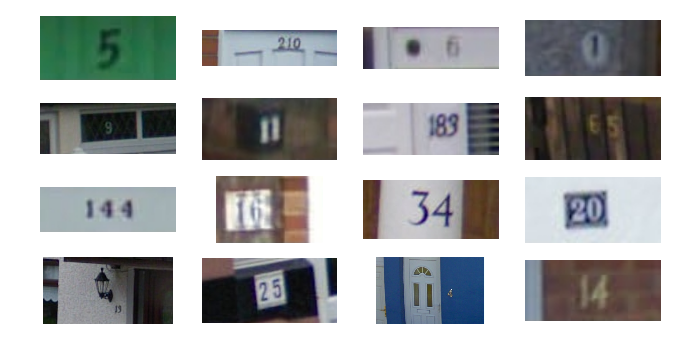

In [4]:
plt.figure(figsize=(8,4))
for i in range(16):
    datapoint = rawdata_train[i]
    img = scipy.misc.imread('../inputs/test/'+datapoint['filename'])
    plt.subplot(4,4,i+1)
    plt.imshow(img)
    plt.axis('off')

### Distribution of lengths

In [5]:
lengths_train = [datapoint['length'] for datapoint in rawdata_train]
lengths_test = [datapoint['length'] for datapoint in rawdata_test]

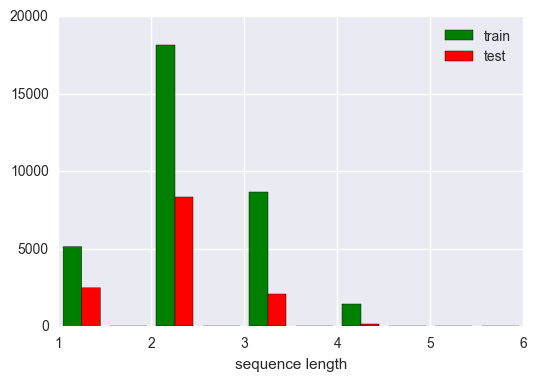

In [6]:
plt.hist([lengths_train,lengths_test], label=['train','test'], color=['green','red']);
plt.xlabel('sequence length')
plt.legend()

### Flatten dataset

In [7]:
# flatten to get statistics on digits
digits_train = [datapoint['labels'] for datapoint in rawdata_train]
digits_train = np.concatenate(digits_train)
digits_train[digits_train==10] = 0

digits_test = [datapoint['labels'] for datapoint in rawdata_test]
digits_test = np.concatenate(digits_test)
digits_test[digits_test==10] = 0

In [8]:
print "number of flattened training samples : {}".format(len(digits_train))

number of flattened training samples : 73257


### Distribution of labels

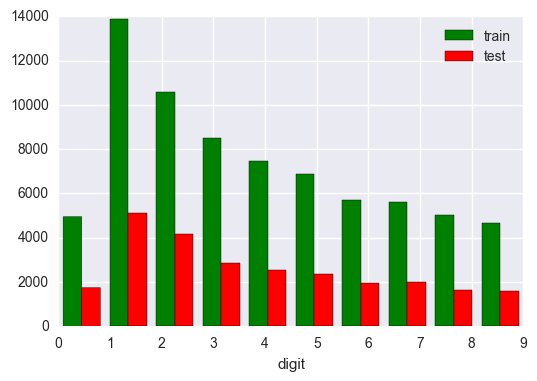

In [9]:
plt.hist([digits_train,digits_test], label=['train','test'], color=['green','red']);
plt.xlabel('digit')
plt.legend()